# 0. Overview
- This notebook handles the exploratory data analysis of the given dataset.


In [1]:
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train_df = pickle.load(open('../data/processed/train_df.pkl', 'rb'))
val_df = pickle.load(open('../data/processed/val_df.pkl', 'rb'))
test_df = pickle.load(open('../data/processed/test_df.pkl', 'rb'))

In [3]:
X_train = train_df[['title_length', 'body_length']]
X_val = val_df[['title_length', 'body_length']]
X_test = test_df[['title_length', 'body_length']]

y_train = train_df.cleaned_y.values
y_val = val_df.cleaned_y.values
y_test = test_df.cleaned_y.values

In [4]:
all_rows = []
for c in tqdm([0.001, 0.01, 0.1, 1, 10, 100, 1000]):
    clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    val_acc = accuracy_score(y_val, clf.predict(X_val))
    all_rows.append({
        'c': c,
        'train_acc': round(train_acc, 2),
        'val_acc': round(val_acc, 2)
    })

100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


In [5]:
pd.DataFrame(all_rows)

,c,train_acc,val_acc
0,0.001,0.39,0.39
1,0.010,0.39,0.39
2,0.100,0.39,0.39
3,1.000,0.39,0.39
4,10.000,0.39,0.39
5,100.000,0.39,0.39
6,1000.000,0.39,0.39


In [7]:
all_data = pd.concat([train_df, val_df, test_df]).reset_index(drop = True)
all_data.shape

(60000, 11)

# 1. Distribution

In [9]:
import seaborn as sns

In [ ]:
# Label Distibution

In [13]:
all_data.head(2)

,Id,Title,Body,Tags,CreationDate,Y,cleaned_y,body_notag,all_text,title_length,body_length
0,47236918,click edit button any record will fetch first ...,I have a problem\r\nWhen I click the Edit butt...,<php><html><mysql><sql>,2017-11-11 10:31:22,LQ_EDIT,1,have problem click edit button any record will...,click edit button any record will fetch first ...,12,90
1,43043808,to filter username harmful characters,<p>i really need help from you guys !!\nsome o...,<php><html>,2017-03-27 10:21:57,LQ_CLOSE,0,really need help you guys of friends scamming ...,to filter username harmful characters really n...,5,26


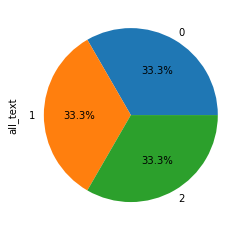

In [14]:
y_dist_data = all_data.groupby('cleaned_y').agg('count')['all_text']
y_dist_data.plot.pie(autopct="%.1f%%");

# 2. Text Analysis

## 2.1 Text Length

In [15]:
all_data['total_length'] = all_data.title_length + all_data.body_length

In [18]:
top_length = np.percentile((all_data['total_length'].values), 99)
top_length

757.010000000002

<AxesSubplot:xlabel='total_length', ylabel='Count'>

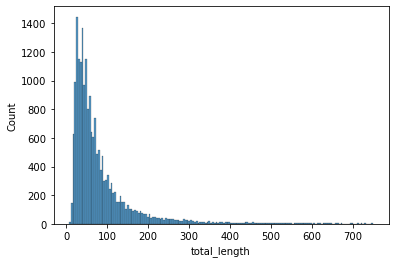

In [20]:
sns.histplot(all_data.query('cleaned_y == 0 & total_length < {}'.format(top_length)).total_length)

In [ ]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5))
word  =  train[train['y'] == 'HQ']['body'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax  =  ax1, color = 'red')
ax1.set_title('High Quality Questions')
word  =  train[(train['y'] == 'LQ_EDIT') | (train['y'] == 'LQ_CLOSE')]['body'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax  =  ax2, color = 'green')
ax2.set_title('Low  Quality Questions')
fig.suptitle('Average word length in each question')